# Lab | Data Aggregation and Filtering

Objective: Use Python programming techniques to filter and order data subsets, group data by one or more variables, and use aggregation functions to obtain insights, and derive meaningful conclusions from the data.

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

Start by reading the dataset, standardizing column names, dealing with null values and creating the month column. You can do so by using the functions you developed in previous labs, or by reading the clean dataset you saved in the last lab `data structuring and combining`.

Then, answer the following questions:

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the median customer lifetime value by education level and gender.

5. Find the maximum, minimum, and average number of open complaints by state and policy type.

6. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

7. Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

8. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('mca_data_clean.csv', sep=';') # load data
df

,unnamed:_0,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
1,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
2,10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,2011-01-02,Employed,M,...,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A,1
3,13,KR82385,California,5454.587929,No,Basic,Master,2011-01-26,Employed,M,...,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A,1
4,16,FH51383,California,5326.677654,No,Basic,High School or Below,2011-02-07,Employed,F,...,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4538,10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,...,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A,1
4539,10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A,1
4540,10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
4541,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1


In [2]:
# 1. total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign
df1 = df[ (df['total_claim_amount'] > 1000) & (df['response'] == 'Yes')]
df1.shape

(27, 27)

In [3]:
# 2. Analyze average total_claim_amount by each policy type and gender with response = Yes

df2 = df[ df['response'] == 'Yes'].groupby(['policy_type','gender']).agg({'total_claim_amount':'mean'}).rename(columns={'total_claim_amount': 'mean_total_claim_amount'})

df2

mean_total_claim_amount
policy_type    gender                         
Corporate Auto F                    404.104008
               M                    391.370774
Personal Auto  F                    457.056315
               M                    472.489180
Special Auto   F                    495.689401
               M                    368.523035

In [6]:
# 3. total customers who have policies in each state, states where there are more than 500 customers.

df3 = df.groupby(['state']).agg({'customer_id':'count'}).rename(columns = {'customer_id':'number_of_customers'})
df3 = df3[df3['number_of_customers'] > 500]
df3

,number_of_customers
state,
Arizona,868
California,1552
Oregon,1281


In [7]:
# 4. Find the median customer lifetime value by education level and gender.
df4 = df.groupby(['education', 'gender']).agg({'customer_lifetime_value': 'median'}).round(2).rename(columns={'customer_lifetime_value':'median_customer_lifetime_value'})
df4

median_customer_lifetime_value
education            gender                                
Bachelor             F                              5752.49
                     M                              5797.38
College              F                              5642.60
                     M                              6005.85
Doctor               F                              5789.85
                     M                              5843.99
High School or Below F                              5978.75
                     M                              6081.48
Master               F                              5714.17
                     M                              5512.34

In [8]:
# 5. Find the maximum, minimum, and average number of open complaints by state and policy type.

df5 = df.groupby(['state','policy_type']).agg({'number_of_open_complaints':['max','min','mean']}).round(2)

df5

number_of_open_complaints          
                                                max min  mean
state      policy_type                                       
Arizona    Corporate Auto                         5   0  0.46
           Personal Auto                          5   0  0.41
           Special Auto                           3   0  0.23
California Corporate Auto                         4   0  0.30
           Personal Auto                          5   0  0.40
           Special Auto                           4   0  0.39
Nevada     Corporate Auto                         3   0  0.39
           Personal Auto                          5   0  0.42
           Special Auto                           3   0  0.29
Oregon     Corporate Auto                         4   0  0.33
           Personal Auto                          5   0  0.37
           Special Auto                           5   0  0.33
Washington Corporate Auto                         4   0  0.47
           Personal Auto                          5   0  0.41
           Special Auto                           4   0  0.56

In [10]:
# 6. The marketing team wants to analyze the number of policies sold by state and month.
# Present the data in a table where the months are arranged as columns and the states are arranged as rows.

df6 = df.groupby(['state','effective_to_date_month']).agg({'customer_id':'count'}).rename(columns={'customer_id':'policies_sold'})

df6 = df6.pivot_table( index=['state'], columns=['effective_to_date_month'], values = 'policies_sold')

df6

effective_to_date_month,1,2
state,,
Arizona,453,415
California,826,726
Nevada,247,197
Oregon,676,605
Washington,207,191


In [14]:
# 7. Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states 
# with the highest number of policies sold.
'''
Hint:
To accomplish this, you will first need to group the data by state and month, 
then count the number of policies sold for each group. Afterwards, you will need 
to sort the data by the count of policies sold in descending order.
Next, you will select the top 3 states with the highest number of policies sold.
Finally, you will create a new DataFrame that contains the number of policies 
sold by month for each of the top 3 states.
'''

top_3_states = df.groupby(['state']).agg(
    {'customer_id':'count'}).rename(
    columns={'customer_id':'policies_sold'}).sort_values(
    'policies_sold', ascending = False).iloc[:3,-1]

df7 = df[ df['state'].isin(
    list(top_3_states.index))].groupby(
    ['effective_to_date_month','state']).agg(
    {'customer_id':'count'}).rename(
    columns={'customer_id':'policies_sold'}).sort_values(
    ['effective_to_date_month','policies_sold'], ascending=[True,False])

df7

policies_sold
effective_to_date_month state                    
1                       California            826
                        Oregon                676
                        Arizona               453
2                       California            726
                        Oregon                605
                        Arizona               415

In [15]:
# 8. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.
# Hint: You can use melt to unpivot the data and create a table that 
# shows the customer response rate (those who responded "Yes") by marketing channel.

df8 = df.groupby(['sales_channel','response']).agg({'response':'count'}).rename(columns={'response':'total'})

df8_pivot = pd.pivot_table(df8.reset_index(), values='total', index ='sales_channel', columns='response')

df8_pivot['response_rate'] = (df8_pivot['Yes'] / df8_pivot['No'] * 100).round(1)

display(df8_pivot)


response,No,Yes,response_rate
sales_channel,,,
Agent,1419,332,23.4
Branch,1123,123,11.0
Call Center,786,97,12.3
Web,574,89,15.5


# Lab | Customer Analysis Round 3
+ For this lab, we still keep using the marketing_customer_analysis.csv file. You can find the file in the files_for_lab folder.

### Get the data
+ Use the same jupyter file from the last lab, Customer Analysis Round 3

### EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
1. Show DataFrame info.
2. Describe DataFrame.
3. Show a plot of the total number of responses.
4. Show a plot of the response rate by the sales channel.
5. Show a plot of the response rate by the total claim amount.
6. Show a plot of the response rate by income.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline

# 1. Show DataFrame info.
display(df.info())

# 2. Describe DataFrame.
display(df.describe().round(2)) # describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543 entries, 0 to 4542
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     4543 non-null   int64  
 1   customer_id                    4543 non-null   object 
 2   state                          4543 non-null   object 
 3   customer_lifetime_value        4543 non-null   float64
 4   response                       4543 non-null   object 
 5   coverage                       4543 non-null   object 
 6   education                      4543 non-null   object 
 7   effective_to_date              4543 non-null   object 
 8   employmentstatus               4543 non-null   object 
 9   gender                         4543 non-null   object 
 10  income                         4543 non-null   int64  
 11  location_code                  4543 non-null   object 
 12  marital_status                 4543 non-null   o

None

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_date_month
count,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00,4543.00
mean,5540.24,8033.71,37453.03,93.77,15.11,48.15,0.39,2.98,436.48,1.47
std,3149.15,6959.53,30257.40,35.09,10.16,28.15,0.91,2.39,295.03,0.50
min,2.00,1904.00,0.00,61.00,0.00,0.00,0.00,1.00,0.10,1.00
25%,2884.00,4039.09,0.00,69.00,6.00,24.00,0.00,1.00,265.69,1.00
50%,5549.00,5846.52,34455.00,83.00,14.00,47.00,0.00,2.00,384.00,1.00
75%,8283.00,8936.60,61560.00,110.00,23.00,72.00,0.00,4.00,552.00,2.00
max,10908.00,83325.38,99961.00,298.00,35.00,99.00,5.00,9.00,2893.24,2.00


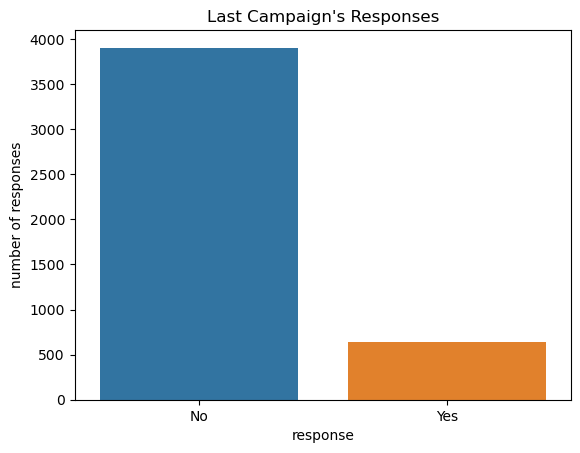

In [17]:
# 3. Show a plot of the total number of responses.

fig, ax = plt.subplots()
sns.countplot(data=df, x="response", ax = ax)

ax.set_xlabel("response")
ax.set_ylabel("number of responses")
ax.set_title("Last Campaign's Responses")

plt.show()

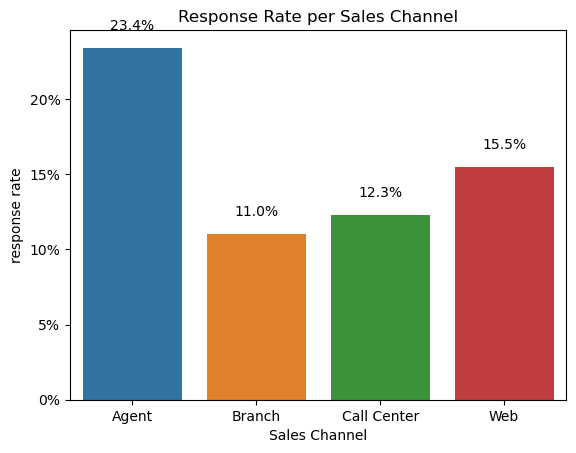

In [18]:
# 4. Show a plot of the response rate by the sales channel.

df_plot3 = df8_pivot.reset_index()

fig, ax = plt.subplots()
sns.barplot(data=df_plot3, x='sales_channel', y='response_rate')
ax.set_xlabel("Sales Channel")
ax.set_ylabel("response rate")
ax.set_title("Response Rate per Sales Channel")

# Format y-axis tick labels to include the '%' symbol
fmt = '%.0f%%'
yticks = plt.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

# Add y-values on top of the bars
for i, v in enumerate(df_plot3['response_rate']):
    plt.text(i, v + 1, str(v)+'%', ha='center', va='bottom')

plt.show()


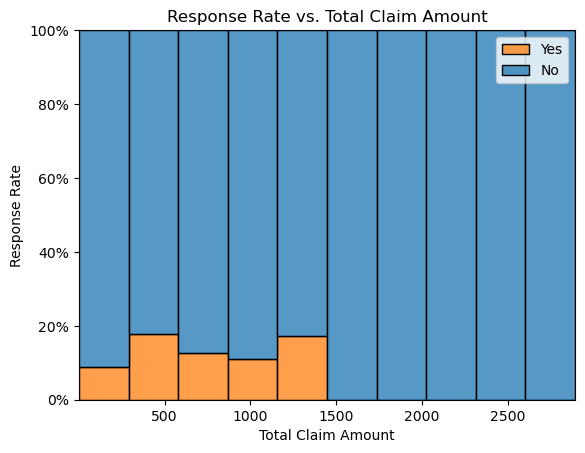

In [113]:
# 5. Show a plot of the response rate by the total claim amount.

# Copy total_claim_amount and response columns into new DataFrame
data = pd.DataFrame()
data['total_claim_amount']  = df['total_claim_amount']
data['response'] =  df['response']

# Change Yes and No values in response column to True / False
data['response'] = [ True if x == 'Yes' else False for x in data['response']]

# Plot the histogram using seaborn
ax = sns.histplot(data=data, x='total_claim_amount', bins=10, hue='response', multiple='fill')

# Change the legend labels
ax.legend(['Yes', 'No'])

# Convert y-axis labels from ratio to percent
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Add labels and title to the plot
plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')
plt.title('Response Rate vs. Total Claim Amount')

# Show the plot
plt.show()

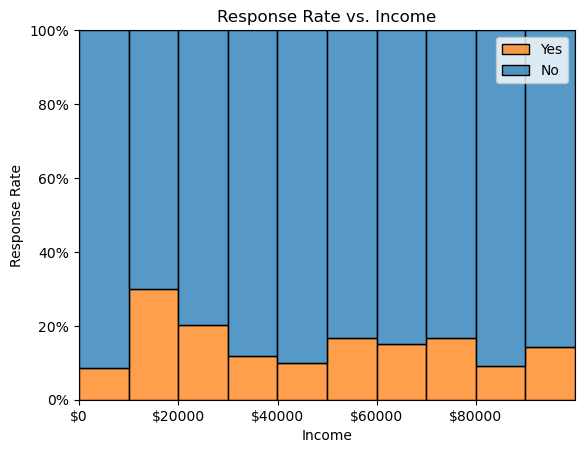

In [114]:
# 6. Show a plot of the response rate by income.

# Copy total_claim_amount and response columns into new DataFrame
data = pd.DataFrame()
data['income']  = df['income']
data['response'] =  df['response']

# Change Yes and No values in response column to True / False
data['response'] = [ True if x == 'Yes' else False for x in data['response']]

# Plot the histogram using seaborn
ax = sns.histplot(data=data, x='income', bins=10, hue='response', multiple='fill')

# Change the legend labels
ax.legend(['Yes', 'No'])

# Format y-axis labels from ratio to percent
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

# Format x-axis labels with dollar sign
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '${:.0f}'.format(x)))

# Add labels and title to the plot
plt.xlabel('Income')
plt.ylabel('Response Rate')
plt.title('Response Rate vs. Income')

# Show the plot
plt.show()

![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Data Transformations

In today's lesson, we talked about continuous distributions (mainly normal distribution), linear regression, and how multicollinearity can impact the model. In this lab, we will test your knowledge of those things using the `marketing_customer_analysis.csv` file. You can continue using the same Jupyter file. The file can be found in the `files_for_lab` folder.

### Get the data 

Use the Jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task 

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical columns look symmetrical? Compute the skewness for each, and add a comment with your findings.
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one that is less correlated with the column `total_claim_amount`. Write code for both the correlation matrix. If there is no pair of features that have a high correlation, then do not drop any features.
- Plot the heatmap of the correlation matrix after the filtering.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline

# Load data
df = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

# Describe data
display(df.describe())

# Display column data types
display(df.dtypes)

# Split numerical & categorical columns into dfs
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include='object')

# Display numerical & categorical dfs
display(df_num)
display(df_cat)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [46]:
# Function to plot boxplots and histograms for numerical columns

def plot_numeric_columns(dataframe, plot_type='histogram'):
    numerical_columns = dataframe.select_dtypes(include=[np.number]).columns
    num_plots = len(numerical_columns)
    num_rows = int(np.ceil(num_plots / 2))
    num_cols = 4

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    fig.subplots_adjust(hspace=0.4)

    for i, column in enumerate(numerical_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        if plot_type == 'histogram':
            ax.hist(dataframe[column], bins=20, edgecolor='black')
            ax.set_ylabel('Frequency')
        elif plot_type == 'boxplot':
            ax.boxplot(dataframe[column], vert = False)

        ax.set_xlabel(column)
        ax.set_title(f'{plot_type.capitalize()} of {column}')

    # Remove empty subplots
    if num_plots < num_rows * num_cols:
        if num_rows > 1:
            for i in range(num_plots, num_rows * num_cols):
                fig.delaxes(axes[i // num_cols, i % num_cols])
        else:
            for i in range(num_plots, num_rows * num_cols):
                fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

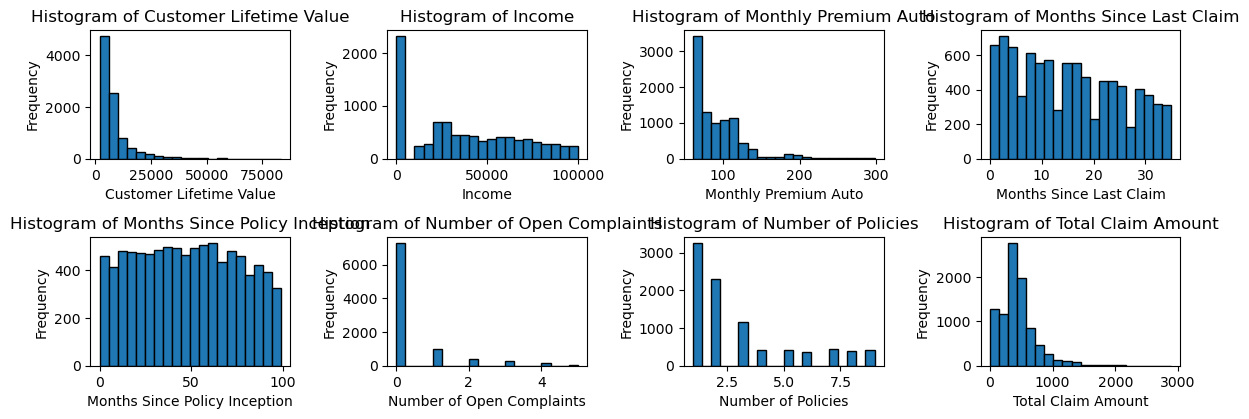

None

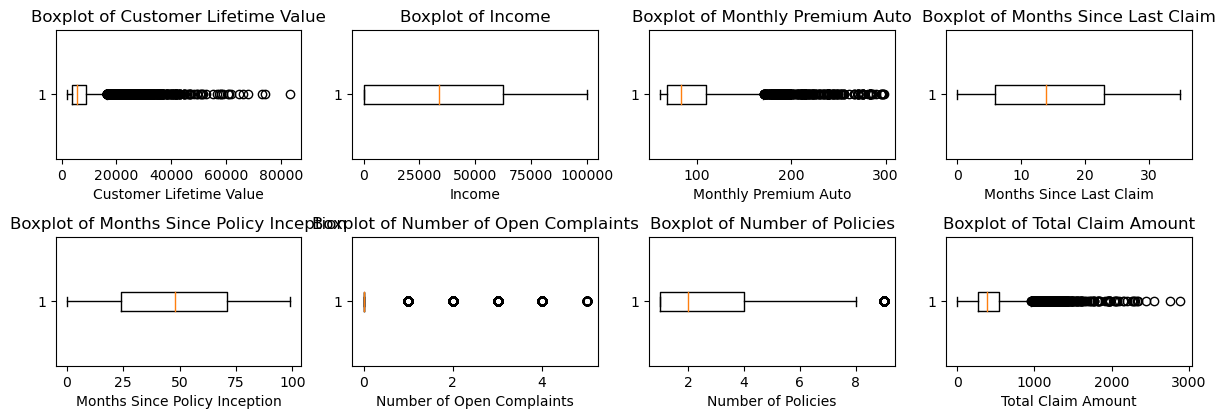

None

In [48]:
# Plot histograms for numerical columns
display(plot_numeric_columns(df, plot_type = 'histogram'))
# Plot boxplots for numerical columns
display(plot_numeric_columns(df, plot_type = 'boxplot'))

In [50]:
# Function to calculate skewness of numerical columns

def calculate_skew(df, interval=(-2, 2)):
    numerical_cols = df.select_dtypes(include='number').columns
    skew_values = []
    for col in numerical_cols:
        skew = df[col].skew()
        is_outside_interval = not (interval[0] <= skew <= interval[1])
        skew_values.append((col, skew, is_outside_interval))

    result_df = pd.DataFrame(skew_values, columns=['Column', 'Skew', 'Outside Interval'])
    return result_df

In [53]:
# Calculate skewness of numerical columns
calculate_skew(df, interval = (-2,2))

,Column,Skew,Outside Interval
0,Customer Lifetime Value,3.032280,True
1,Income,0.286887,False
2,Monthly Premium Auto,2.123546,True
3,Months Since Last Claim,0.278586,False
4,Months Since Policy Inception,0.040165,False
5,Number of Open Complaints,2.783263,True
6,Number of Policies,1.253333,False
7,Total Claim Amount,1.714966,False


In [87]:
def select_features_for_linear_models_based_on_correlation(df: pd.DataFrame, y: str, threshold=0.75) -> list:
    '''
    Input
    df: pd.DataFrame
    y: column to be predicted

    Output
    list: list of strings
    '''

    df2 = df.copy()

    correlation_matrix = df2.corr()#.reset_index()

    list_of_selected_columns = list(correlation_matrix[y].loc[abs(correlation_matrix[y])>=threshold].index)

    return list_of_selected_columns

In [90]:
# Check which columns have a high correlation with the target variable: Total Claim Amount
select_features_for_linear_models_based_on_correlation(df_num,'Total Claim Amount',threshold=0.9)

['Total Claim Amount']

+ No columns have a correlation factor > 0.9, so none are dropped.

In [69]:
def plot_corr_matrix(df):
    # Calculate the correlation matrix
    correlation_matrix = df.corr(numeric_only = True)

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the correlation matrix as a heatmap
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='magma', linewidths=0.5, linecolor='lightgray',
                cbar=True, square=True, xticklabels=True, yticklabels=True, ax=ax)

    # Customize the plot
    plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
    plt.xticks(fontsize=10, rotation=45, ha='right')
    plt.yticks(fontsize=10)

    # Show the plot
    plt.tight_layout()
    plt.show()

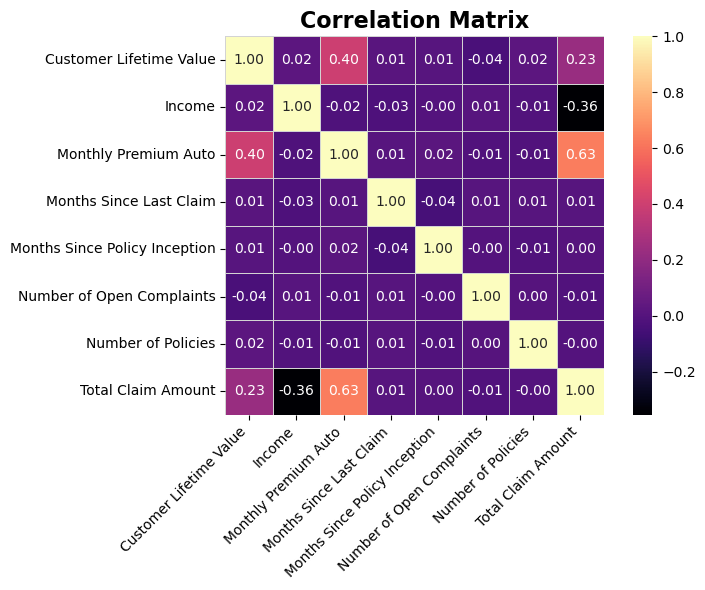

In [70]:
# Plot the correlation matrix as a heatmap
plot_corr_matrix(df)